# <u><font color="blue">A STUDY ON WASHINGTON DC CRIME

### Team 4: Members - Balasubramanian, Zhi Xiang, Johnny

### <font color="blue">INTRODUCTION</font>

*Crime in Washington, D.C., is directly related to the city's demographics, geography, and unique criminal justice system. In Washington D.C, the demographic pattern is such that there is a divide between the affluent neighborhoods west of Rock Creek Park from the less well-off neighborhoods to the east.*

*Despite being the headquarters of multiple federal law enforcement agencies, such as the Federal Bureau of Investigation (FBI) and United States Drug Enforcement Administration (DEA), the nationwide crack epidemic of the 1980s and 1990s greatly affected the city and led to large increases in crime. The city eventually became known as the "murder capital" of the United States.*

*The crime rate started to fall in the mid-1990s as the crack cocaine epidemic gave way to economic revitalization projects. Neighborhood improvement efforts and new business investment have also started to transform neighborhoods east of the Anacostia River, leading to the first rise in the District's population in 60 years.*

*By the mid-2000s, crime rates in Washington dropped to their lowest levels in over 20 years. As in many major cities, crime remains a notable problem in D.C. This is true even in the city's northwestern neighborhoods, which tend to be more affluent and have more entertainment options. Crimes also remains a problem especially in the city's highest concentration of poverty.*

*In our study, we aim to find out whether Washington D.C is indeed becoming a safer city over the years. We also want to look at whether common crimes such as thefts occur more commonly only during certain part of the day (and hence the police can step up patrol during the evening for example). Lastly, we also want to look at whether the occurance of robbery is influenced by how well-off the neighbourhood is.*


### <u>Section 1: Data Preparation and Extraction</u>

*In this section, we first import the numpy and pandas libraries to facilitate advanced mathematical and other types of operations on large numbers of data, as well as dataframe operations for data analysis*

*We also import the matplotlib and seaborn libraries which are the visualization libraries for data plotting*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette = 'Reds_r', font_scale = 1.5)   # plot customization
pd.set_option('display.max_columns', 100)       # to make all columns visible in the DataFrame

In [2]:
# first thing we do is to determine our working directory
# this is important as there are multiple users accessing the file from different directories

import os

os.listdir('/kaggle/input/dc-crime')

['dc_crime_add_vars.csv', 'DC_Properties.csv']

In [3]:
# second, we use the pd.read_csv() function to read the Washington DC crime CSV as a pandas DataFrame
# we then assign the DataFrame to a variable: crime_df

crime_df = pd.read_csv('/kaggle/input/dc-crime/dc_crime_add_vars.csv', index_col = 0)   # Please read from the directory the CSV is saved in
crime_df.head(10)

,X,REPORT_DAT,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,ANC,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,CCN,START_DATE,END_DATE,XBLOCK,YBLOCK,optional,date,year,month,day,hour,minute,second,EW,NS,quad,crimetype
1,1,8/31/2008 20:47,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,2E,Cluster 4,000300 1,300.0,Precinct 6,8123749,8/30/2008 21:30,8/31/2008 18:40,-77.070209,38.913633,True,8/31/2008 20:47,2008,8,31,20,47,0,West,North,Northwest,Non-Violent
2,2,9/1/2008 0:45,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,2B,Cluster 6,005500 5,5500.0,Precinct 14,8123824,8/31/2008 19:30,8/31/2008 23:30,-77.045323,38.908564,True,9/1/2008 0:45,2008,9,1,0,45,0,West,North,Northwest,Non-Violent
3,3,9/1/2008 3:00,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,2C,Cluster 8,005800 1,5800.0,Precinct 129,8123835,8/31/2008 23:00,9/1/2008 2:00,-77.027045,38.899057,True,9/1/2008 3:00,2008,9,1,3,0,0,East,North,Northeast,Non-Violent
4,4,9/9/2008 7:46,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,2B,Cluster 6,005301 3,5301.0,Precinct 15,8127848,9/9/2008 7:10,9/9/2008 0:00,-77.040089,38.909638,True,9/9/2008 7:46,2008,9,9,7,46,0,West,North,Northwest,Non-Violent
5,5,8/24/2008 20:00,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,2C,Cluster 8,005900 1,5900.0,Precinct 143,8120153,8/5/2008 12:00,8/5/2008 13:00,-77.019377,38.894573,True,8/24/2008 20:00,2008,8,24,20,0,0,East,North,Northeast,Non-Violent
6,6,8/24/2008 21:40,EVENING,THEFT/OTHER,OTHERS,G STREET NW AND 12TH STREET NW,1.0,105.0,2,2C,Cluster 8,005800 1,5800.0,Precinct 129,8120189,8/24/2008 16:30,8/24/2008 21:24,-77.028078,38.898315,True,8/24/2008 21:40,2008,8,24,21,40,0,East,North,Northeast,Non-Violent
7,7,8/25/2008 6:00,MIDNIGHT,THEFT/OTHER,OTHERS,1000 - 1099 BLOCK OF 26TH STREET NW,2.0,207.0,2,2A,Cluster 5,005600 1,5600.0,Precinct 4,8120280,8/24/2008 23:30,8/25/2008 4:16,-77.054750,38.903264,True,8/25/2008 6:00,2008,8,25,6,0,0,West,North,Northwest,Non-Violent
8,8,9/1/2008 13:30,DAY,BURGLARY,OTHERS,1707 - 1799 BLOCK OF S STREET NW,3.0,301.0,2,2B,Cluster 6,004202 1,4202.0,Precinct 15,8123978,8/31/2008 17:30,9/1/2008 12:30,-77.040472,38.914088,True,9/1/2008 13:30,2008,9,1,13,30,0,West,North,Northwest,Non-Violent
9,9,9/1/2008 14:00,DAY,THEFT/OTHER,OTHERS,1300 - 1699 BLOCK OF CONNECTICUT AVENUE NW,3.0,308.0,2,2B,Cluster 6,005500 1,5500.0,Precinct 14,8123989,9/1/2008 13:20,9/1/2008 13:30,-77.043607,38.909927,True,9/1/2008 14:00,2008,9,1,14,0,0,West,North,Northwest,Non-Violent
10,10,9/1/2008 17:10,EVENING,THEFT/OTHER,OTHERS,3RD STREET SW AND MARYLAND AVENUE SW,1.0,102.0,2,2C,NaN,006202 1,6202.0,Precinct 129,8124024,9/1/2008 15:15,9/1/2008 15:30,-77.015172,38.888185,True,9/1/2008 17:10,2008,9,1,17,10,0,East,South,Southeast,Non-Violent


### <u>Section 2: Data Manipulation, Exploration and Analysis</u>

*In this section, we explore the summary statistics of the dataset and see if there are missing values in the relevant columns within our DataFrame*

1. View the basic statistical details like percentile, mean, std etc. of the DataFrame.
2. To view a summary of the DataFrame.
3. Extract relevant columns to test our hypothesis in a new dataframe.

### <u><font color="blue">*Our 3 Hypothesis for this study:*

1. Washington DC is getting safer over the years
2. Theft usually happens in the evening
3. There are more nighttime robbery in the more affluent parts of Washington D.C.

In [4]:
# to view the basic statistical data like percentile, mean, std etc. of the DataFrame

crime_df.describe()

,X,DISTRICT,PSA,WARD,CENSUS_TRACT,CCN,XBLOCK,YBLOCK,year,month,day,hour,minute,second
count,342867.000000,342667.000000,342616.000000,342867.000000,341776.000000,3.428670e+05,342867.000000,342867.000000,342867.000000,342867.000000,342867.000000,342867.000000,342867.000000,342867.000000
mean,171434.000000,3.727415,378.080069,4.449501,6218.780511,1.265285e+07,-77.008139,38.905970,2012.543651,6.655686,15.979505,13.228853,26.294750,6.789986
std,98977.321711,1.977502,197.334627,2.378859,3137.022064,2.845777e+06,0.036324,0.031595,2.810362,3.327466,8.760185,6.233693,18.106904,14.926954
min,1.000000,1.000000,101.000000,1.000000,100.000000,1.000600e+05,-77.113642,38.813470,2008.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,85717.500000,2.000000,206.000000,2.000000,3500.000000,1.012491e+07,-77.032380,38.890940,2010.000000,4.000000,8.000000,9.000000,10.000000,0.000000
50%,171434.000000,4.000000,401.000000,5.000000,7000.000000,1.303074e+07,-77.013122,38.906430,2013.000000,7.000000,16.000000,14.000000,28.000000,0.000000
75%,257150.500000,5.000000,507.000000,6.000000,8904.000000,1.510258e+07,-76.985523,38.925286,2015.000000,9.000000,23.000000,18.000000,42.000000,0.000000
max,342867.000000,7.000000,708.000000,8.000000,11100.000000,9.943899e+07,-76.910010,38.994901,2017.000000,12.000000,31.000000,23.000000,59.000000,59.000000


In [5]:
# to view a summary of the DataFrame

crime_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 342867 entries, 1 to 342867
Data columns (total 31 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   X                     342867 non-null  int64  
 1   REPORT_DAT            342867 non-null  object 
 2   SHIFT                 342867 non-null  object 
 3   OFFENSE               342867 non-null  object 
 4   METHOD                342867 non-null  object 
 5   BLOCK                 342867 non-null  object 
 6   DISTRICT              342667 non-null  float64
 7   PSA                   342616 non-null  float64
 8   WARD                  342867 non-null  int64  
 9   ANC                   342867 non-null  object 
 10  NEIGHBORHOOD_CLUSTER  338162 non-null  object 
 11  BLOCK_GROUP           341776 non-null  object 
 12  CENSUS_TRACT          341776 non-null  float64
 13  VOTING_PRECINCT       342783 non-null  object 
 14  CCN                   342867 non-null  int64  
 15  

In [6]:
# to determine the total number of 'NaN' values in each column

crime_df.isna().sum()

X                           0
REPORT_DAT                  0
SHIFT                       0
OFFENSE                     0
METHOD                      0
BLOCK                       0
DISTRICT                  200
PSA                       251
WARD                        0
ANC                         0
NEIGHBORHOOD_CLUSTER     4705
BLOCK_GROUP              1091
CENSUS_TRACT             1091
VOTING_PRECINCT            84
CCN                         0
START_DATE                 13
END_DATE                11651
XBLOCK                      0
YBLOCK                      0
optional                    0
date                        0
year                        0
month                       0
day                         0
hour                        0
minute                      0
second                      0
EW                          0
NS                          0
quad                        0
crimetype                   0
dtype: int64

### <font color="blue">Testing of Hypothesis 1: 

### Washington DC is getting safer over the years

Explanatory Factor: Year-on-Year Crime Rates; 
Explained Factor: Becoming safer (trending downwards)

In [7]:
# filter out unnecessary columns

df1 = crime_df[['SHIFT', 'OFFENSE', 'METHOD', 'DISTRICT', 'NEIGHBORHOOD_CLUSTER', 'VOTING_PRECINCT', 
                'year', 'quad', 'crimetype']]

df1.sample(10)

,SHIFT,OFFENSE,METHOD,DISTRICT,NEIGHBORHOOD_CLUSTER,VOTING_PRECINCT,year,quad,crimetype
42789,DAY,THEFT/OTHER,OTHERS,2.0,Cluster 5,Precinct 4,2010,Northwest,Non-Violent
66692,MIDNIGHT,BURGLARY,OTHERS,2.0,Cluster 13,Precinct 9,2011,Northwest,Non-Violent
107269,EVENING,THEFT/OTHER,OTHERS,4.0,Cluster 17,Precinct 59,2014,Northeast,Non-Violent
115207,EVENING,MOTOR VEHICLE THEFT,OTHERS,5.0,Cluster 23,Precinct 77,2009,Northeast,Non-Violent
99250,DAY,THEFT F/AUTO,OTHERS,4.0,Cluster 17,Precinct 61,2017,Northeast,Non-Violent
27877,MIDNIGHT,THEFT F/AUTO,OTHERS,2.0,Cluster 6,Precinct 17,2015,Northwest,Non-Violent
8096,EVENING,BURGLARY,OTHERS,3.0,Cluster 3,Precinct 141,2010,Northeast,Non-Violent
42700,DAY,BURGLARY,OTHERS,2.0,Cluster 6,Precinct 17,2010,Northwest,Non-Violent
208560,EVENING,THEFT/OTHER,OTHERS,5.0,Cluster 26,Precinct 85,2008,Northeast,Non-Violent
227608,EVENING,MOTOR VEHICLE THEFT,OTHERS,6.0,Cluster 30,Precinct 99,2014,Northeast,Non-Violent


In [8]:
# shorten column names

df1.rename(columns = {'VOTING_PRECINCT': 'PRECINCT',
                     'NEIGHBORHOOD_CLUSTER': 'CLUSTER'}, inplace = True)
df1.sample(10)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,SHIFT,OFFENSE,METHOD,DISTRICT,CLUSTER,PRECINCT,year,quad,crimetype
86017,DAY,THEFT/OTHER,OTHERS,4.0,Cluster 18,Precinct 47,2011,Northeast,Non-Violent
297355,EVENING,THEFT/OTHER,OTHERS,4.0,Cluster 2,Precinct 41,2009,Northeast,Non-Violent
342843,EVENING,THEFT/OTHER,OTHERS,3.0,Cluster 2,Precinct 41,2008,Northeast,Non-Violent
218551,DAY,BURGLARY,OTHERS,6.0,Cluster 30,Precinct 100,2011,Northeast,Non-Violent
183665,DAY,BURGLARY,OTHERS,1.0,Cluster 26,Precinct 91,2016,Southeast,Non-Violent
235341,EVENING,THEFT/OTHER,OTHERS,6.0,Cluster 31,Precinct 97,2017,Northeast,Non-Violent
285554,MIDNIGHT,ASSAULT W/DANGEROUS WEAPON,GUN,7.0,Cluster 38,Precinct 117,2012,Southeast,Violent
19962,EVENING,THEFT/OTHER,OTHERS,2.0,Cluster 6,Precinct 15,2013,Northwest,Non-Violent
120895,MIDNIGHT,ROBBERY,GUN,5.0,Cluster 21,Precinct 19,2012,Northeast,Violent
254155,DAY,BURGLARY,OTHERS,7.0,Cluster 39,Precinct 121,2008,Southeast,Non-Violent


[Text(0.5, 0, 'Year'),
 Text(0, 0.5, 'No. of Offense'),
 Text(0.5, 1.0, 'Fig. 2 DC YoY Crime Rate (Breakdown by Offense)')]

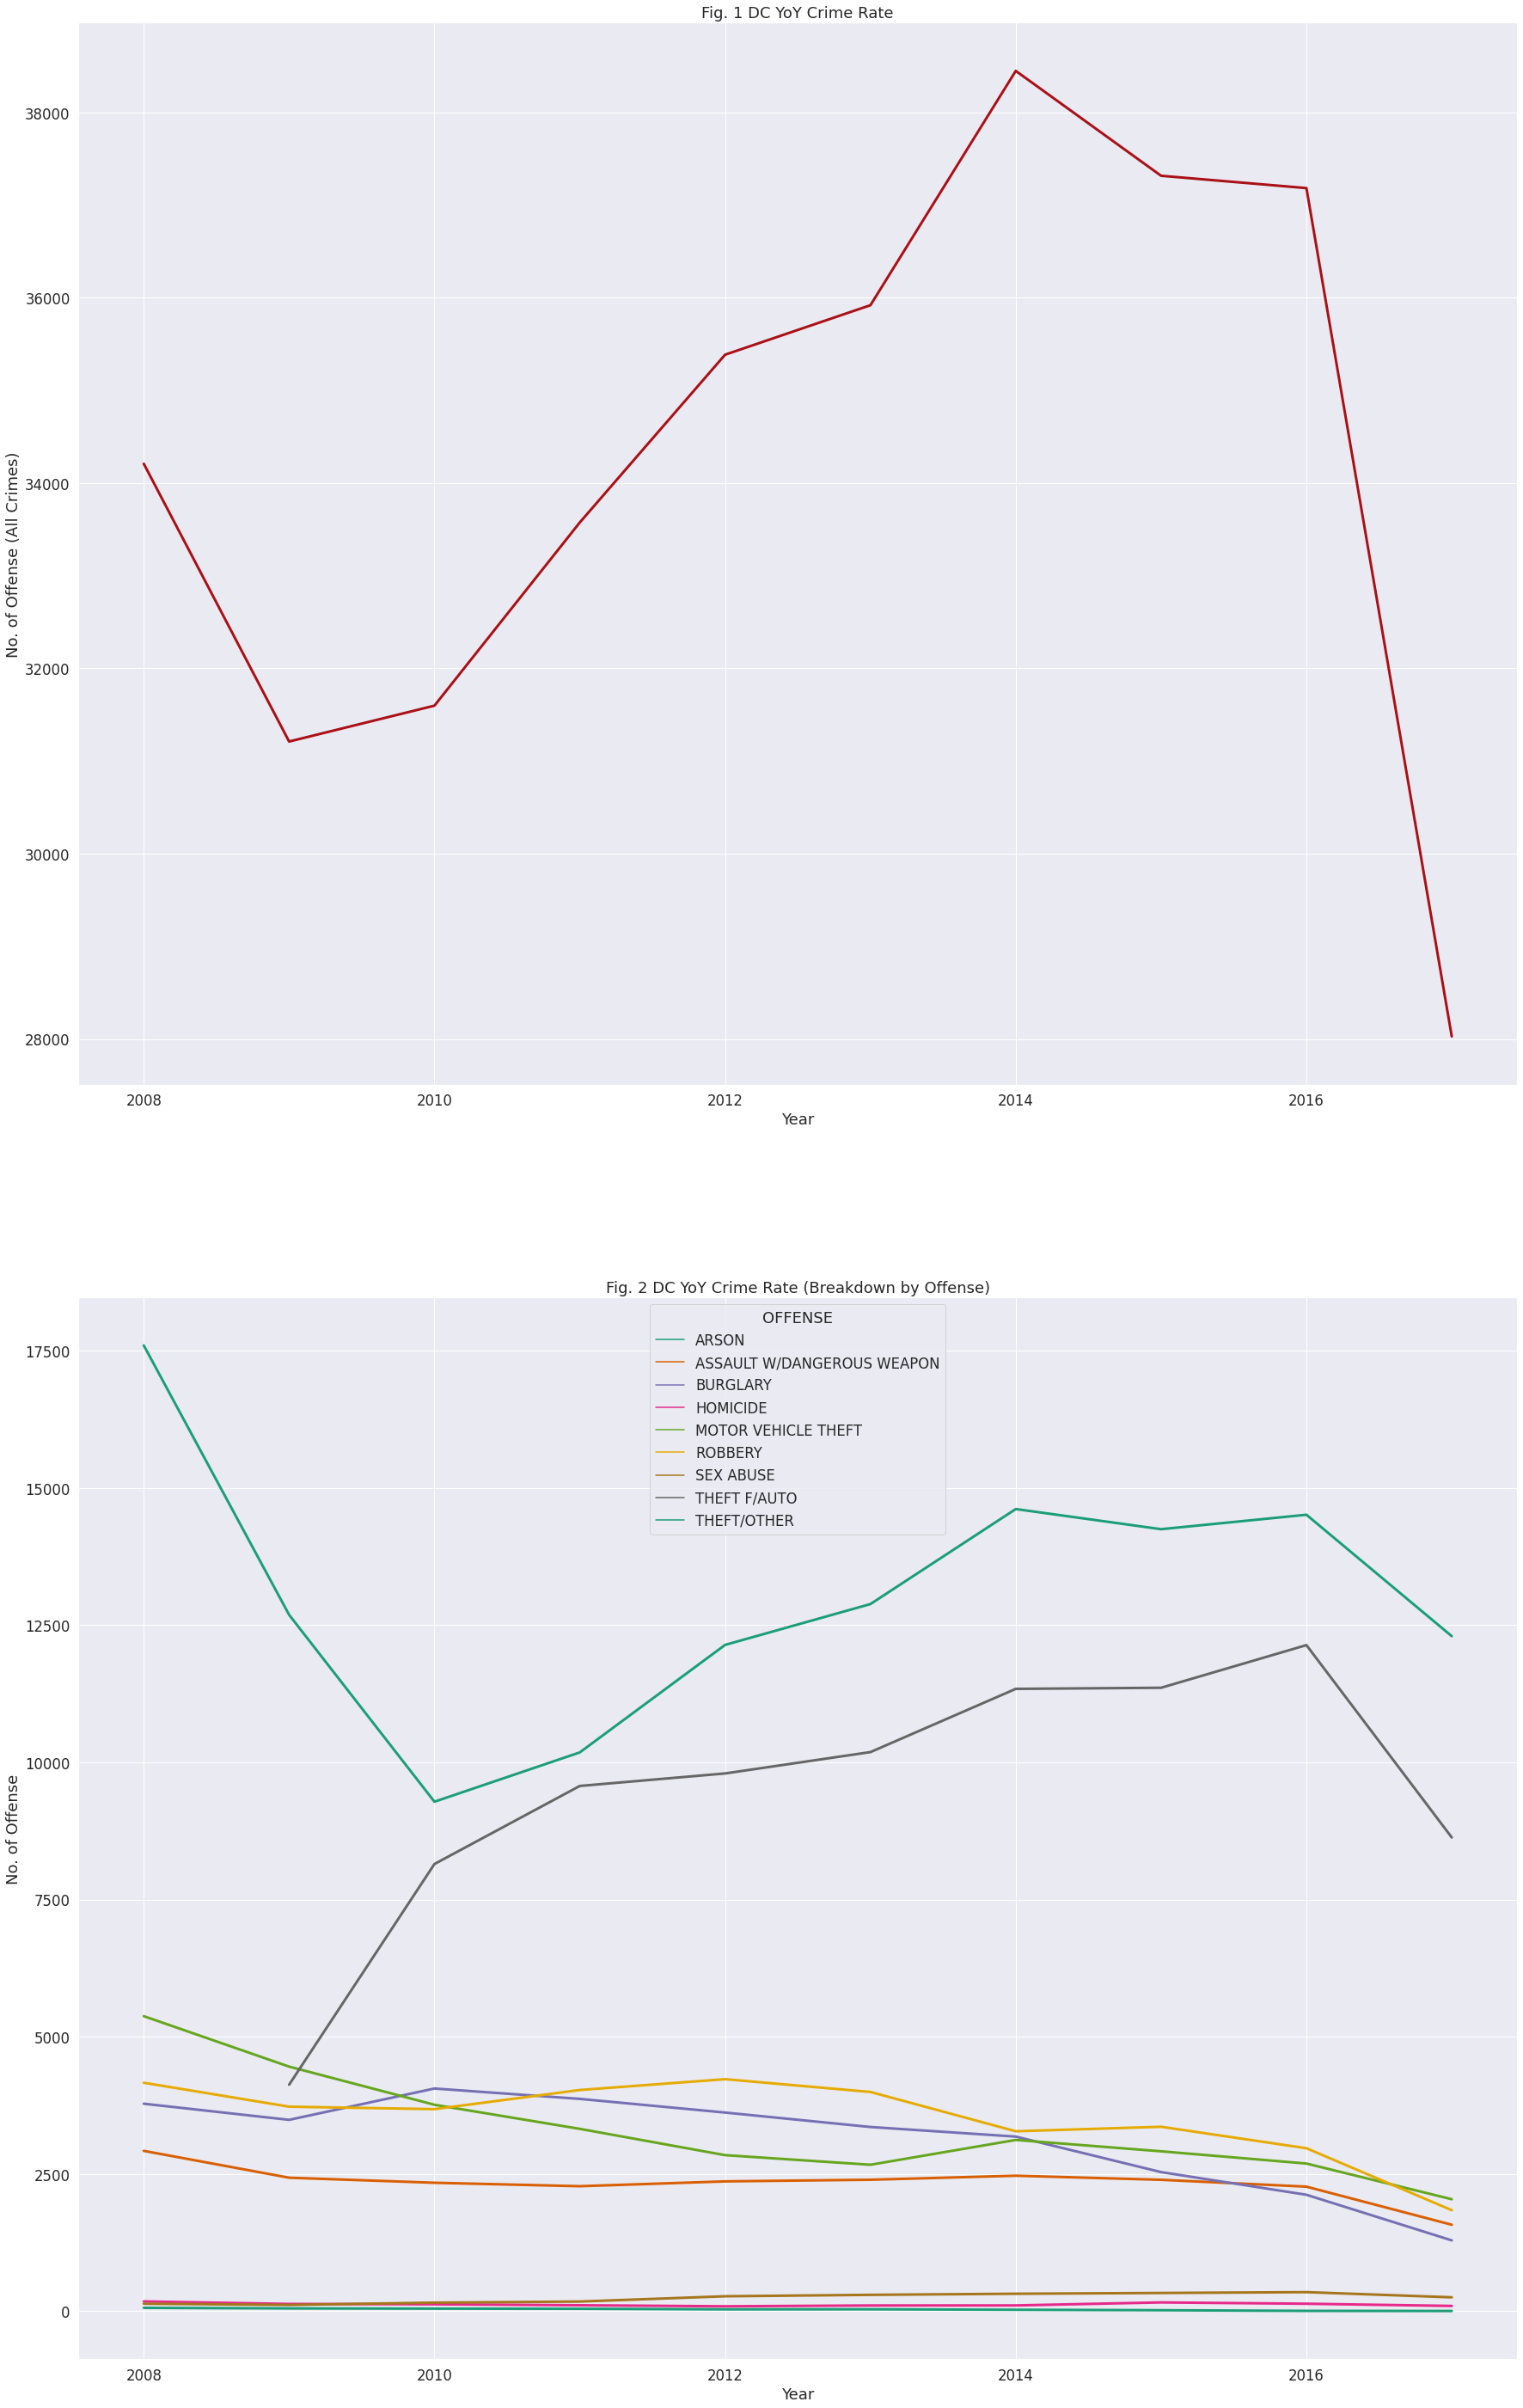

In [9]:
# to do a lineplot on the DC crime rates trend

fig, ax = plt.subplots(2, 1, figsize = (30, 50))


# DC YoY Crime Rate (Overall)

df1_crime_rate = df1.groupby(['year']).count()
sns.lineplot(x = 'year', y = 'OFFENSE', linewidth = 3, data = df1_crime_rate, ax = ax[0])
ax[0].set(xlabel = 'Year', ylabel = 'No. of Offense (All Crimes)', title = 'Fig. 1 DC YoY Crime Rate')


# DC YoY Crime Rate (Breakdown)

df1_crime_breakdown = df1.groupby(['OFFENSE', 'year']).count()
sns.lineplot(x = 'year', y = 'SHIFT', hue = 'OFFENSE', palette = 'Dark2', linewidth = 3,
             data = df1_crime_breakdown, ax = ax[1])
ax[1].set(xlabel = 'Year', ylabel = 'No. of Offense', title = 'Fig. 2 DC YoY Crime Rate (Breakdown by Offense)')


# <font color="blue">Test Result for Hypothesis 1: 

### We hypothesised that Washington DC is getting safer over the years. At first glance, Fig 1 shows that it is not true because the Overall Crime Rate is actually trending upwards between 2008 - 2016.

### However, upon further in-depth analysis of the breakdown of the different offense type (Fig. 2), we observed downward trends in the following Offenses: Robbery, Motor Vehicle Theft, Burglary, and Assault with Dangerous Weapon, and upward trends in the following Offenses: Theft from Auto and Other Thefts.
    
### However, the overall data is skewed upwards due to a huge number of Theft from Auto and Other Theft offenses. 
    
### To note: We attribute the huge drop in Crime Rate in 2017 to increased policing efforts and deem it as an outlier. 
    
### <font color="red">Result: HYPOTHESIS DEBUNKED!
    
### In conclusion, Washington DC is not getting safer over the years in terms of overall crime rate. While violent offenses like Burglary and Assault with Dangerous Weapon are certainly decreasing over the years, the inhabitants are still susceptible to other non-violent offenses such as Thefts. 

### <font color="blue">Testing of Hypothesis 2: 

### Thefts usually happens from the evening onwards
    
Explanatory Factor: Thefts; 
Explained Factor: Happens most frequently in the Evening & Midnight

In [10]:
df1.sample(10)

,SHIFT,OFFENSE,METHOD,DISTRICT,CLUSTER,PRECINCT,year,quad,crimetype
270725,EVENING,ASSAULT W/DANGEROUS WEAPON,GUN,7.0,Cluster 38,Precinct 116,2015,Southeast,Violent
88846,MIDNIGHT,THEFT F/AUTO,OTHERS,4.0,Cluster 18,Precinct 48,2012,Northwest,Non-Violent
17227,DAY,THEFT F/AUTO,OTHERS,1.0,NaN,Precinct 129,2012,Northeast,Non-Violent
316192,DAY,THEFT F/AUTO,OTHERS,3.0,Cluster 2,Precinct 23,2015,Northeast,Non-Violent
133886,EVENING,THEFT F/AUTO,OTHERS,5.0,Cluster 22,Precinct 71,2015,Northeast,Non-Violent
22189,EVENING,THEFT/OTHER,OTHERS,2.0,Cluster 4,Precinct 6,2014,Northwest,Non-Violent
213190,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,6.0,Cluster 32,Precinct 107,2009,Southeast,Non-Violent
316883,DAY,THEFT/OTHER,OTHERS,3.0,Cluster 3,Precinct 22,2015,Northeast,Non-Violent
252541,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,6.0,Cluster 35,Precinct 113,2008,Southeast,Non-Violent
199457,EVENING,THEFT F/AUTO,OTHERS,3.0,Cluster 7,Precinct 18,2013,Northeast,Non-Violent


In [11]:
# first, we want to look at what are the unique values under 'Offense' that relate to thefts in general

df1['OFFENSE'].unique()

array(['THEFT/OTHER', 'MOTOR VEHICLE THEFT', 'BURGLARY', 'ROBBERY',
       'ASSAULT W/DANGEROUS WEAPON', 'THEFT F/AUTO', 'SEX ABUSE',
       'HOMICIDE', 'ARSON'], dtype=object)

In [12]:
# we deterimine there are 3 subtypes of thefts that will be grouped under the category of 'Theft'
# subsets: 'THEFT/OTHER', 'MOTOR VEHICLE THEFT', 'THEFT F/AUTO'
# to do so, we used a boolean function to determine which row falls under the above
# we then append this data to a new column 'Theft' in a duplicated DataFrame df1_copy

df1_copy = df1.copy()
df1_copy['THEFT'] = df1_copy['OFFENSE'].map(lambda x: x == 'THEFT/OTHER' or x == 'MOTOR VEHICLE THEFT' or x == 'THEFT F/AUTO')
df1_copy.sample(10)

,SHIFT,OFFENSE,METHOD,DISTRICT,CLUSTER,PRECINCT,year,quad,crimetype,THEFT
7904,DAY,THEFT F/AUTO,OTHERS,3.0,Cluster 6,Precinct 15,2010,Northwest,Non-Violent,True
235580,EVENING,ASSAULT W/DANGEROUS WEAPON,GUN,6.0,Cluster 30,Precinct 99,2017,Northeast,Violent,False
101104,MIDNIGHT,THEFT F/AUTO,OTHERS,4.0,Cluster 18,Precinct 48,2009,Northeast,Non-Violent,True
110762,DAY,MOTOR VEHICLE THEFT,OTHERS,4.0,Cluster 18,Precinct 55,2008,Northeast,Non-Violent,True
306297,DAY,THEFT/OTHER,OTHERS,3.0,Cluster 3,Precinct 137,2012,Northeast,Non-Violent,True
146874,EVENING,THEFT/OTHER,OTHERS,5.0,Cluster 22,Precinct 71,2013,Northeast,Non-Violent,True
252663,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,6.0,Cluster 34,Precinct 140,2008,Southeast,Non-Violent,True
254508,DAY,MOTOR VEHICLE THEFT,OTHERS,7.0,Cluster 28,Precinct 114,2009,Southeast,Non-Violent,True
202644,DAY,THEFT/OTHER,OTHERS,3.0,Cluster 3,Precinct 21,2015,Northeast,Non-Violent,True
101860,DAY,THEFT/OTHER,OTHERS,4.0,Cluster 18,Precinct 47,2009,Northeast,Non-Violent,True


In [13]:
# second, we group the DataFrame by theft and non-theft offenses, follows by 'SHIFT'
# this is so that we can determine the number of theft and non-theft offenses, according to 'SHIFT'

df1_grouped = df1_copy.groupby(['THEFT', 'SHIFT']).count().reset_index()
df1_grouped

,THEFT,SHIFT,OFFENSE,METHOD,DISTRICT,CLUSTER,PRECINCT,year,quad,crimetype
0,False,DAY,25067,25067,25061,24710,25062,25067,25067,25067
1,False,EVENING,39812,39812,39801,39270,39807,39812,39812,39812
2,False,MIDNIGHT,29078,29078,29064,28680,29074,29078,29078,29078
3,True,DAY,106831,106831,106757,105407,106817,106831,106831,106831
4,True,EVENING,105737,105737,105673,104238,105698,105737,105737,105737
5,True,MIDNIGHT,36342,36342,36311,35857,36325,36342,36342,36342


[Text(0.5, 0, 'Shift'),
 Text(0, 0.5, 'No. of Offense'),
 Text(0.5, 1.0, 'Fig 3. No. of Thefts')]

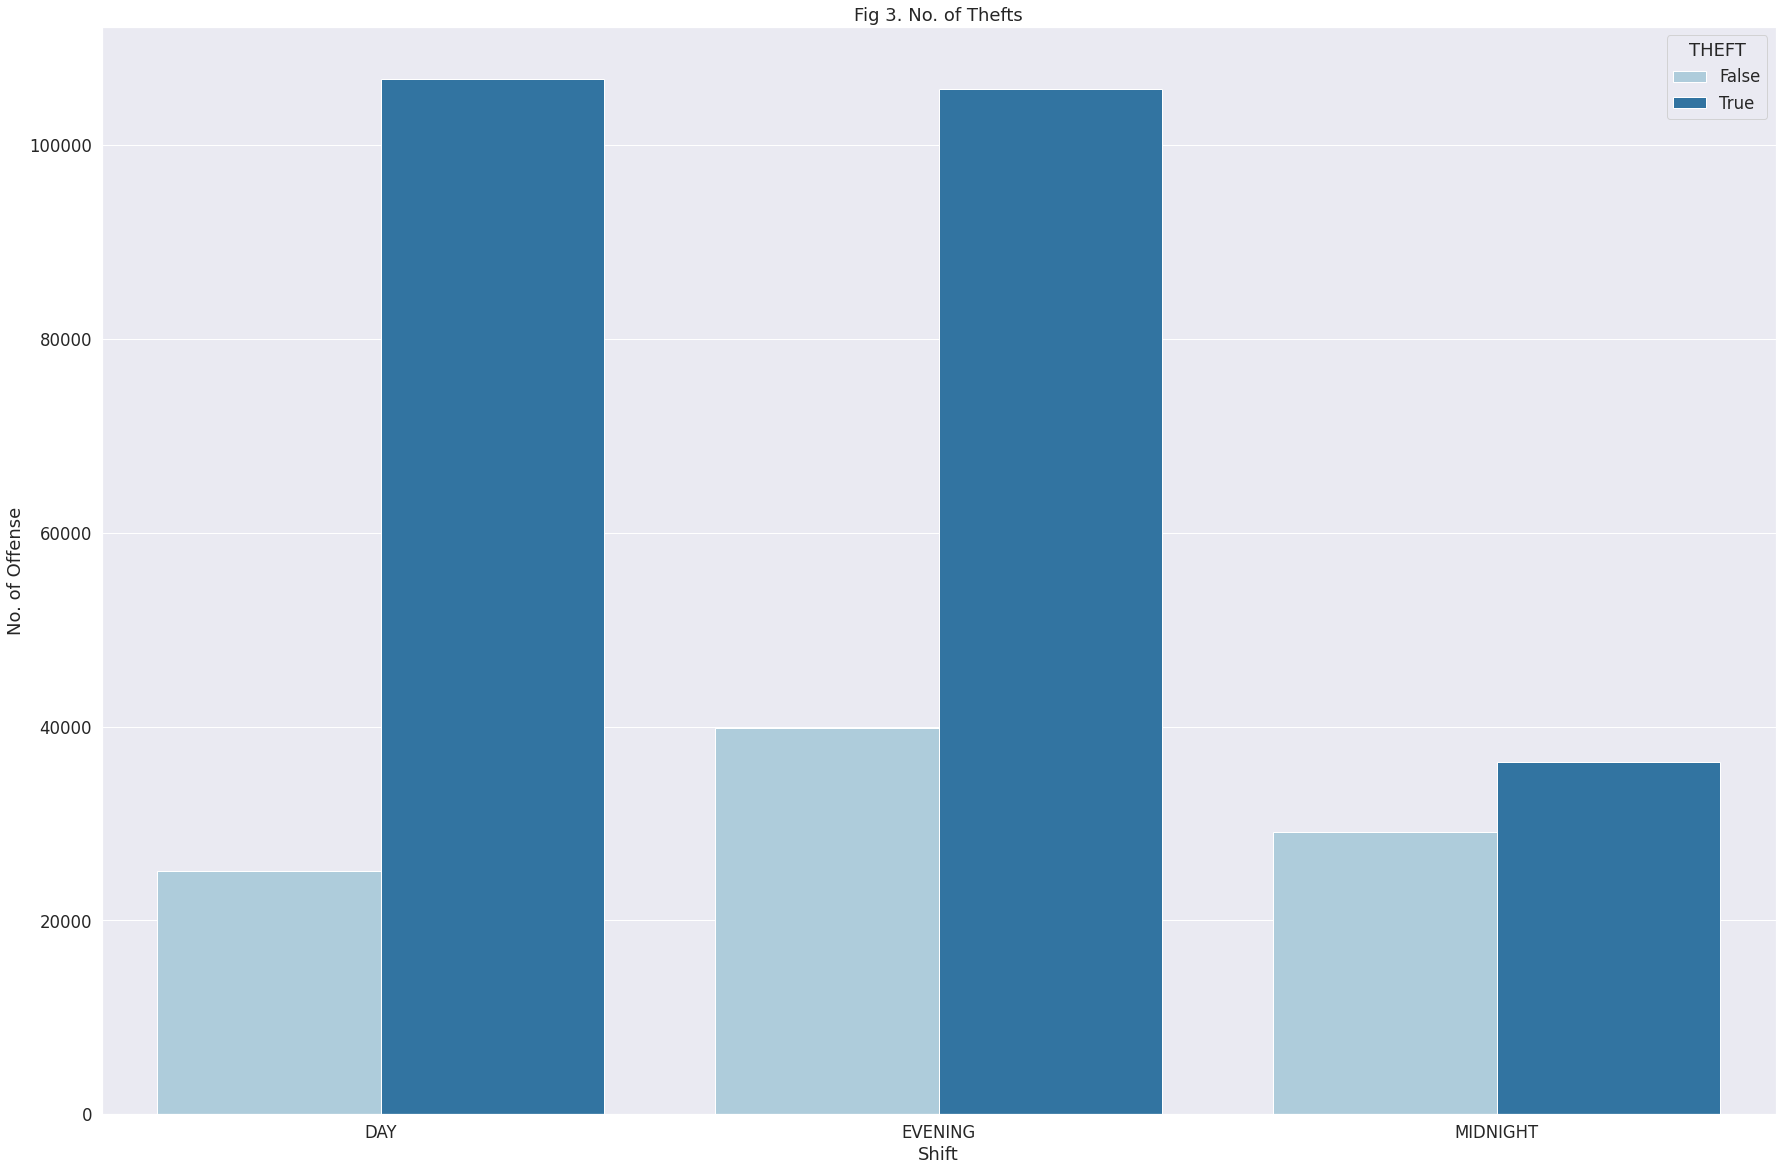

In [14]:
# next, we will plot a histogram based on the number of theft crimes committed in each of the 3 shifts

fig, ax = plt.subplots(figsize = (30, 20))

sns.barplot(x = 'SHIFT', y = 'OFFENSE', hue = 'THEFT', palette = 'Paired', data = df1_grouped)
ax.set(xlabel = 'Shift', ylabel = 'No. of Offense', title = 'Fig 3. No. of Thefts')

# <font color="blue"> Test Result for Hypothesis 2: 

### We hypothesised that Thefts are usually committed from the evening onwards. However, based on analysis (Fig. 3), that is not true. While Thefts are commonly committed in the evening, it is rarely committed during midnight. Furthermore, the occurences of Thefts in the day is slightly more than that in the evening (106,831 vs 105,737).
    
### <font color="red"> Result: HYPOTHESIS DEBUNKED!
    
### In conclusion, thefts are usually committed before the sky turns dark (before evening). DCPD should definitely step up day-time policing efforts.

### <u>Section 3: Data Augmentation</u>

*In this section, we use an external dataset on DC property prices to infer on how affluent each quardrant in Washington DC is (i.e. we assume the higher the property prices in the quadrant, the more affluent that quadrant is)*

Source: https://www.kaggle.com/christophercorrea/dc-residential-properties?select=DC_Properties.csv

We compare the property prices with the number of daytime robbery in our first dataset.

### <font color="blue">Testing of Hypothesis 3: 

### There are more midnight robberies in the more affluent parts of Washington D.C.
Explanatory Factor: (1) Midnight, (2) Robbery; 
Explained Factor: More occurences in the more affluent parts (based on land prices in psf)

In [15]:
# first, we use the pd.read_csv() function to read the externally sourced DC Properties CSV as a pandas DataFrame
# we then assign the DataFrame to a variable: property_df

property_df = pd.read_csv('/kaggle/input/dc-crime/DC_Properties.csv', 
                          index_col = 0)   # Please read from the directory the CSV is saved in

property_df.sample(10)

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3552: DtypeWarning: Columns (18,19,20,21,22,23,24,33,34,35,37,43,45) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
107309,1,0,Warm Cool,Y,NaN,5,2,1949.0,1991.0,1949,NaN,NaN,NaN,U,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,16,1309,7/22/2018 18:01,Condominium,1302.0,715.0,NaN,NaN,NaN,20032.0,NaN,38.821792,-77.006345,Congress Heights,016 A Congress Heights,10900.0,NaN,Ward 8,6254,-77.006347,38.821799,SW
37812,2,2,Hot Water Rad,Y,1.0,7,3,1934.0,NaN,1992,2.0,NaN,NaN,U,1,3130.0,1,2 Story,Single,Superior,Good,Common Brick,Slate,Hardwood,1.0,2,12,24394,7/22/2018 18:01,Residential,NaN,NaN,4501 29TH STREET NW,WASHINGTON,DC,20008.0,18S UJ 21696 13057,38.948338,-77.057541,Forest Hills,NaN,1301.0,001301 1015,Ward 3,2254,-77.057543,38.948980,NW
157693,2,0,Ht Pump,Y,NaN,4,1,1990.0,NaN,1990,NaN,9/27/2010 0:00,910000.0,Q,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,17,112,7/22/2018 18:01,Condominium,3036.0,927.0,NaN,NaN,NaN,20004.0,NaN,38.894305,-77.022462,Central-tri 3,NaN,5800.0,NaN,Ward 2,408,-77.022465,38.894313,NW
84549,1,0,Hot Water Rad,N,1.0,6,3,1939.0,NaN,1954,2.0,10/30/2006 0:00,NaN,U,1,992.0,1,2 Story,Row Inside,Average,Average,Common Brick,Built Up,Hardwood,1.0,0,11,1195,7/22/2018 18:01,Residential,NaN,NaN,430 19TH STREET NE,WASHINGTON,DC,20002.0,18S UJ 28509 07071,38.895789,-76.977472,Old City 1,039 H Old City 1,7901.0,007901 2000,Ward 6,4547,-76.978090,38.895753,NE
87494,1,0,Forced Air,Y,1.0,5,2,1945.0,2004.0,1956,2.0,2/1/2008 0:00,158000.0,U,1,810.0,1,2 Story,Semi-Detached,Average,Good,Common Brick,Comp Shingle,Hardwood,1.0,0,13,2179,7/22/2018 18:01,Residential,NaN,NaN,848 51ST STREET NE,WASHINGTON,DC,20019.0,18S UJ 32906 07588,38.901295,-76.926923,Deanwood,018 B Deanwood,7809.0,007809 1004,Ward 7,5177,-76.927810,38.901085,NE
73885,2,0,Warm Cool,Y,1.0,7,3,1942.0,2003.0,1967,2.0,4/5/2018 0:00,NaN,U,7,1020.0,1,2 Story,Row End,Above Average,Average,Common Brick,Built Up,Hardwood,1.0,0,11,3143,7/22/2018 18:01,Residential,NaN,NaN,4612 SARGENT ROAD NE,WASHINGTON,DC,20017.0,18S UJ 27629 12645,38.945814,-76.989010,Brookland,007 B Brookland,9504.0,009504 2000,Ward 5,3916,-76.989519,38.945725,NE
74360,1,1,Warm Cool,Y,1.0,6,3,1951.0,NaN,1961,2.0,11/8/2004 0:00,170000.0,Q,1,1120.0,1,2 Story,Row End,Average,Average,Common Brick,Built Up,Hardwood,1.0,0,11,2238,7/22/2018 18:01,Residential,NaN,NaN,5031 SARGENT ROAD NE,WASHINGTON,DC,20017.0,18S UJ 27618 13266,38.951410,-76.989300,Riggs Park,NaN,9503.0,009503 1017,Ward 5,3909,-76.988633,38.950808,NE
94083,2,0,Hot Water Rad,N,1.0,7,3,1948.0,NaN,1958,2.0,7/13/2017 0:00,NaN,U,2,1224.0,1,2 Story,Semi-Detached,Average,Average,Common Brick,Built Up,Hardwood,1.0,0,13,2948,7/22/2018 18:01,Residential,NaN,NaN,5108 HANNA PLACE SE,WASHINGTON,DC,20019.0,18S UJ 32635 05182,38.879574,-76.929464,Marshall Heights,033 A Marshall Heights,7707.0,007707 1002,Ward 7,5342,-76.930732,38.879723,SE
65100,1,1,Hot Water Rad,N,1.0,7,4,1907.0,NaN,1960,2.0,8/22/2016 0:00,NaN,U,2,2312.0,1,2 Story,Row Inside,Good Quality,Fair,Common Brick,Built Up,Hardwood/Carp,1.0,1,11,1800,7/22/2018 18:01,Residential,NaN,NaN,132 R STREET NE,WASHINGTON,DC,20002.0,18S UJ 26140 09013,38.912811,-77.005261,Eckington,019 B Eckington,8701.0,008701 1000,Ward 5,3523,-77.005409,38.912814,NE
75821,4,0,Forced Air,Y,4.0,17,8,1952.0,NaN,1952,3.0,10/7/2011 0:00,160000.0,U,1,4152.0,1,3 Story,Multi,Average,Fair,Common Brick,Built Up,Carpet,4.0,0,23,2500,7/22/2018 18:01,Residential,NaN,NaN,1111 16TH STREET NE,WASHINGTON,DC,20002.0,18S UJ 28211 08072,38.904743,-76.981155,Trinidad,052 B Trinidad,8804.0,008804 2015,Ward 5,4077,-76.981040,38.904893,NE


In [16]:
property_df.describe()

,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,SALE_NUM,GBA,BLDG_NUM,KITCHENS,FIREPLACES,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,9.821600e+04,158957.000000,106696.000000,158957.000000,106695.000000,158957.000000,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,9.313516e+05,1.680033,1714.539889,1.000598,1.219251,2.374674,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,7.061325e+06,1.285898,880.677860,0.031622,0.621170,737.295595,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,1.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,2.400000e+05,1.000000,1190.000000,1.000000,1.000000,0.000000,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,3.999990e+05,1.000000,1480.000000,1.000000,1.000000,0.000000,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,6.520000e+05,2.000000,1966.000000,1.000000,1.000000,1.000000,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,1.374275e+08,15.000000,45384.000000,5.000000,44.000000,293920.000000,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


In [17]:
# to view a summary of the property DataFrame

property_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 158957 entries, 0 to 158956
Data columns (total 48 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   BATHRM              158957 non-null  int64  
 1   HF_BATHRM           158957 non-null  int64  
 2   HEAT                158957 non-null  object 
 3   AC                  158957 non-null  object 
 4   NUM_UNITS           106696 non-null  float64
 5   ROOMS               158957 non-null  int64  
 6   BEDRM               158957 non-null  int64  
 7   AYB                 158686 non-null  float64
 8   YR_RMDL             80928 non-null   float64
 9   EYB                 158957 non-null  int64  
 10  STORIES             106652 non-null  float64
 11  SALEDATE            132187 non-null  object 
 12  PRICE               98216 non-null   float64
 13  QUALIFIED           158957 non-null  object 
 14  SALE_NUM            158957 non-null  int64  
 15  GBA                 106696 non-nul

In [18]:
# to determine the total number of 'NaN' values in each column

property_df.isna().sum()

BATHRM                     0
HF_BATHRM                  0
HEAT                       0
AC                         0
NUM_UNITS              52261
ROOMS                      0
BEDRM                      0
AYB                      271
YR_RMDL                78029
EYB                        0
STORIES                52305
SALEDATE               26770
PRICE                  60741
QUALIFIED                  0
SALE_NUM                   0
GBA                    52261
BLDG_NUM                   0
STYLE                  52261
STRUCT                 52261
GRADE                  52261
CNDTN                  52261
EXTWALL                52261
ROOF                   52261
INTWALL                52261
KITCHENS               52262
FIREPLACES                 0
USECODE                    0
LANDAREA                   0
GIS_LAST_MOD_DTTM          0
SOURCE                     0
CMPLX_NUM             106696
LIVING_GBA            106696
FULLADDRESS            52917
CITY                   52906
STATE         

In [19]:
# filter out unnecessary columns
# we deem 'SALEDATE', 'QUADRANT', 'LANDAREA', and 'PRICE' as the necessary columns for our purpose

df2 = property_df[['PRICE', 'QUADRANT','LANDAREA','SALEDATE']]

df2.sample(10)

,PRICE,QUADRANT,LANDAREA,SALEDATE
98282,145000.0,SE,5328,3/11/2013 0:00
130819,265000.0,NW,317,7/11/2018 0:00
44564,995000.0,NW,12609,10/30/2003 0:00
81041,99900.0,NE,1620,8/19/1998 0:00
106704,642900.0,NW,716,12/20/2016 0:00
127469,NaN,SE,413,NaN
123494,325000.0,NW,281,7/24/2007 0:00
30949,NaN,NW,3591,12/9/2010 0:00
143500,339900.0,NW,195,5/15/2017 0:00
104530,NaN,SE,4000,4/24/2006 0:00


In [20]:
# second, we need to clean up the data using .dropna() to remove rows containing 'NaN' values
# it is necessary as we intend to use vectorised operations on the columns
# we also want to prevent the data from being skewed

df2_copy = df2.dropna()

df2_copy.sample(10)

,PRICE,QUADRANT,LANDAREA,SALEDATE
68469,289240.0,NE,5847,5/10/2005 0:00
45717,665000.0,NW,5750,9/28/2005 0:00
42412,625000.0,NW,874,11/4/2014 0:00
139826,315000.0,NW,231,12/3/2014 0:00
139042,725000.0,NW,538,7/9/2018 0:00
149208,215000.0,SW,251,4/5/2010 0:00
127630,74900.0,SE,967,6/10/2013 0:00
37237,1208100.0,NW,6927,7/6/2004 0:00
120659,401500.0,NW,191,7/29/2015 0:00
155957,111000.0,NW,83,10/29/2003 0:00


In [21]:
# next, we want to double check and ensure no 'NaN' values

df2_copy.isna().sum()

PRICE       0
QUADRANT    0
LANDAREA    0
SALEDATE    0
dtype: int64

In [22]:
# third, we want to extract only the year from 'SALEDATE', and append it as a new column 'Year' in df2_copy

colname = ['SALEDATE']
df2_proc = pd.read_csv('/kaggle/input/dc-crime/DC_Properties.csv', 
                               usecols = colname)   # Please read from the directory the CSV is saved in
df2_proc = df2_proc.astype(str).copy()
df2_proc['Year'] = '' 

year_list = []

for i in range(len(df2_proc)):
    new_date = df2_proc['SALEDATE'][i] 
    if len(new_date) == 15:
        new_date = new_date[6:10]
    elif len(new_date) == 14:
        new_date = new_date[5:9]
    elif len(new_date) == 13: 
        new_date = new_date[4:8]
    else:
        new_date = ''  
      
    year_list.append(new_date)
       
df2_proc = df2_proc.assign(Year = year_list)

df2_copy['Year'] = df2_proc['Year']

df2_copy.sample(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,PRICE,QUADRANT,LANDAREA,SALEDATE,Year
140747,160000.0,NW,364,8/9/2001 0:00,2001
28491,320000.0,NW,6600,8/13/1996 0:00,1996
86456,77832.0,NE,6209,5/22/2000 0:00,2000
50179,275000.0,NW,1059,7/1/2004 0:00,2004
145028,435000.0,NW,117,10/28/2009 0:00,2009
147894,435000.0,NW,80,10/31/2017 0:00,2017
121006,250000.0,NW,95,5/29/2018 0:00,2018
120380,499000.0,NW,513,6/3/2009 0:00,2009
85268,115000.0,NE,5069,3/29/1999 0:00,1999
124748,70000.0,SE,1155,8/4/2015 0:00,2015


In [23]:
# next, we want to only see the property sale data from 2008 - 2017 to match of the crime dataset

df3 = df2_copy.loc[(df2_copy['Year'] > '2007') & (df2_copy['Year'] < '2018')]

df3.sample(10)

,PRICE,QUADRANT,LANDAREA,SALEDATE,Year
47075,749555.0,NW,5103,5/1/2017 0:00,2017
54322,502000.0,NW,1793,10/24/2011 0:00,2011
18409,2300000.0,NW,2904,12/1/2010 0:00,2010
60145,381000.0,NW,1800,9/30/2009 0:00,2009
134377,178000.0,NW,113,9/22/2009 0:00,2009
19630,5000000.0,NW,5245,12/29/2014 0:00,2014
140873,770000.0,NW,311,4/6/2017 0:00,2017
116262,301000.0,NW,173,5/13/2009 0:00,2009
127323,260000.0,NW,686,8/8/2017 0:00,2017
12676,710000.0,NE,1520,3/2/2016 0:00,2016


In [24]:
# fourth, we group df3 by 'QUADRANT' and sum up the values
# this is to determine the total property prices and land area of the properties in each quadrant
# next, we use vectorize operations to calculate the psf and append the result in a new column 'Avg_PSF'

df3_grouped = df3.groupby(['QUADRANT']).sum().reset_index()
df3_grouped['Avg_PSF'] = df3_grouped['PRICE'] / df3_grouped['LANDAREA']
df3_grouped

,QUADRANT,PRICE,LANDAREA,Avg_PSF
0,NE,6.061860e+09,27332774,221.779912
1,NW,3.159369e+10,63679581,496.135333
2,SE,3.948162e+09,18647192,211.729579
3,SW,6.112335e+08,1486414,411.213492


[Text(0.5, 0, 'Quadrants'),
 Text(0, 0.5, 'Price per Square Feet'),
 Text(0.5, 1.0, "Fig 4. Quadrant's Affluence (based on land price)")]

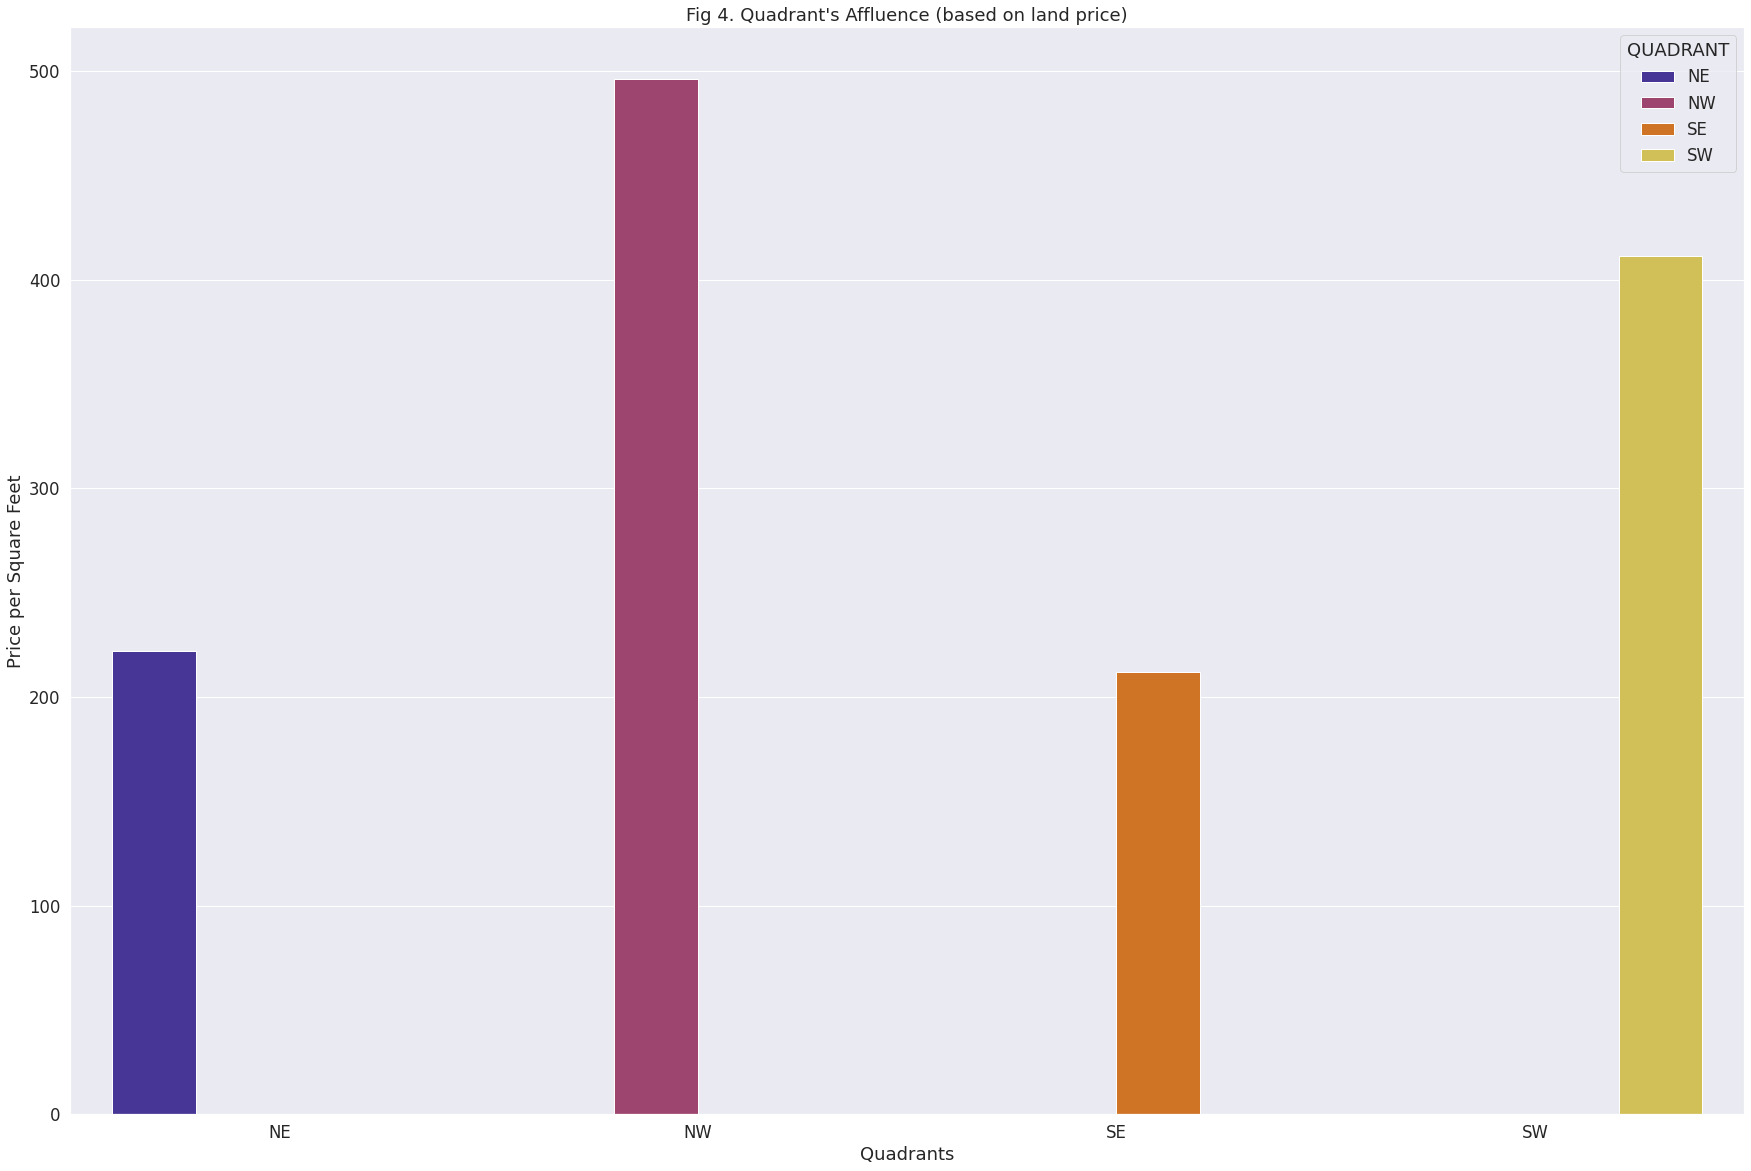

In [25]:
# fifth, we will plot a barplot to visualise the affluence of each quadrant based on their average land price

fig, ax = plt.subplots(figsize = (30, 20))

sns.barplot(x = 'QUADRANT', y = 'Avg_PSF', hue = 'QUADRANT', palette = 'CMRmap', data = df3_grouped)
ax.set(xlabel = 'Quadrants', ylabel = 'Price per Square Feet', 
       title = "Fig 4. Quadrant's Affluence (based on land price)")

In [26]:
# now that we are done with processing the external dataset, we want to go back to our working DC crime dataset
# for recap

df1.sample(10)

,SHIFT,OFFENSE,METHOD,DISTRICT,CLUSTER,PRECINCT,year,quad,crimetype
56205,DAY,THEFT/OTHER,OTHERS,1.0,Cluster 8,Precinct 129,2016,Northeast,Non-Violent
260305,EVENING,THEFT/OTHER,OTHERS,7.0,Cluster 38,Precinct 121,2011,Southeast,Non-Violent
282072,DAY,ROBBERY,GUN,7.0,Cluster 37,Precinct 118,2011,Southeast,Violent
249765,MIDNIGHT,THEFT F/AUTO,OTHERS,6.0,Cluster 30,Precinct 100,2017,Northeast,Non-Violent
336988,EVENING,THEFT/OTHER,OTHERS,3.0,Cluster 2,Precinct 36,2015,Northeast,Non-Violent
93629,EVENING,ROBBERY,OTHERS,4.0,Cluster 17,Precinct 59,2014,Northeast,Violent
77067,DAY,THEFT F/AUTO,OTHERS,2.0,Cluster 14,Precinct 28,2013,Northwest,Non-Violent
228949,EVENING,SEX ABUSE,OTHERS,6.0,Cluster 32,Precinct 132,2015,Southeast,Violent
305062,DAY,THEFT F/AUTO,OTHERS,3.0,Cluster 3,Precinct 37,2012,Northeast,Non-Violent
306306,EVENING,THEFT F/AUTO,OTHERS,4.0,Cluster 2,Precinct 41,2012,Northeast,Non-Violent


In [27]:
# to reconfirm the unique values in 'quad'

df1['quad'].unique()

array(['Northwest', 'Northeast', 'Southeast', 'Southwest'], dtype=object)

In [28]:
# first, we will create a function to rename the value in df1['quad'] to match that of df3_grouped['QUADRANT']
# next, we will append these renamed values into a new similarily named column 'QUADRANT' in a duplicate DataFrame

df4 = df1.copy()

def rename(location):
    if location == 'Northwest':
        return 'NW'
    elif location == 'Southwest':
        return 'SW'
    elif location == 'Northeast':
        return 'NE'
    else:
        return 'SE'
    
df4['QUADRANT'] = df4['quad'].map(rename)
df4 = df4.sort_values('QUADRANT')
df4.sample(10)

,SHIFT,OFFENSE,METHOD,DISTRICT,CLUSTER,PRECINCT,year,quad,crimetype,QUADRANT
211152,EVENING,ROBBERY,GUN,6.0,Cluster 30,Precinct 99,2009,Northeast,Violent,NE
338290,EVENING,ROBBERY,KNIFE,4.0,Cluster 3,Precinct 20,2016,Northeast,Violent,NE
292875,DAY,THEFT/OTHER,OTHERS,7.0,Cluster 39,Precinct 120,2008,Southeast,Non-Violent,SE
190762,DAY,THEFT/OTHER,OTHERS,1.0,Cluster 26,Precinct 89,2008,Southeast,Non-Violent,SE
36896,EVENING,THEFT/OTHER,OTHERS,2.0,Cluster 6,Precinct 17,2017,Northwest,Non-Violent,NW
15672,DAY,THEFT/OTHER,OTHERS,2.0,Cluster 6,Precinct 14,2012,Northwest,Non-Violent,NW
126925,EVENING,THEFT/OTHER,OTHERS,5.0,Cluster 21,Precinct 19,2013,Northeast,Non-Violent,NE
186861,DAY,THEFT/OTHER,OTHERS,1.0,Cluster 25,Precinct 86,2016,Northeast,Non-Violent,NE
51456,EVENING,THEFT/OTHER,OTHERS,1.0,Cluster 8,Precinct 129,2014,Northeast,Non-Violent,NE
90207,DAY,BURGLARY,OTHERS,4.0,Cluster 16,Precinct 62,2013,Northeast,Non-Violent,NE


In [29]:
# second, we want to extract only rows that represent robberies

df4_robbery = df4.loc[df4['OFFENSE'] == 'ROBBERY']

df4_robbery.sample(10)

,SHIFT,OFFENSE,METHOD,DISTRICT,CLUSTER,PRECINCT,year,quad,crimetype,QUADRANT
214835,DAY,ROBBERY,GUN,6.0,Cluster 31,Precinct 93,2010,Northeast,Violent,NE
50500,EVENING,ROBBERY,OTHERS,1.0,Cluster 8,Precinct 129,2013,Northeast,Violent,NE
269329,DAY,ROBBERY,OTHERS,7.0,Cluster 39,Precinct 123,2014,Southeast,Violent,SE
293465,EVENING,ROBBERY,OTHERS,1.0,NaN,Precinct 119,2008,Southeast,Violent,SE
169822,EVENING,ROBBERY,KNIFE,1.0,Cluster 25,Precinct 84,2012,Northeast,Violent,NE
243052,EVENING,ROBBERY,GUN,6.0,Cluster 34,Precinct 110,2013,Southeast,Violent,SE
319926,DAY,ROBBERY,OTHERS,3.0,Cluster 2,Precinct 23,2016,Northeast,Violent,NE
262288,EVENING,ROBBERY,GUN,7.0,Cluster 36,Precinct 115,2011,Southeast,Violent,SE
299328,EVENING,ROBBERY,KNIFE,4.0,Cluster 2,Precinct 41,2010,Northeast,Violent,NE
213759,DAY,ROBBERY,OTHERS,6.0,Cluster 32,Precinct 132,2009,Southeast,Violent,SE


[Text(0.5, 0, 'DC Quadrants'),
 Text(0, 0.5, 'No. of Robbery'),
 Text(0.5, 1.0, 'Fig. 5 DC Robbery Analysis')]

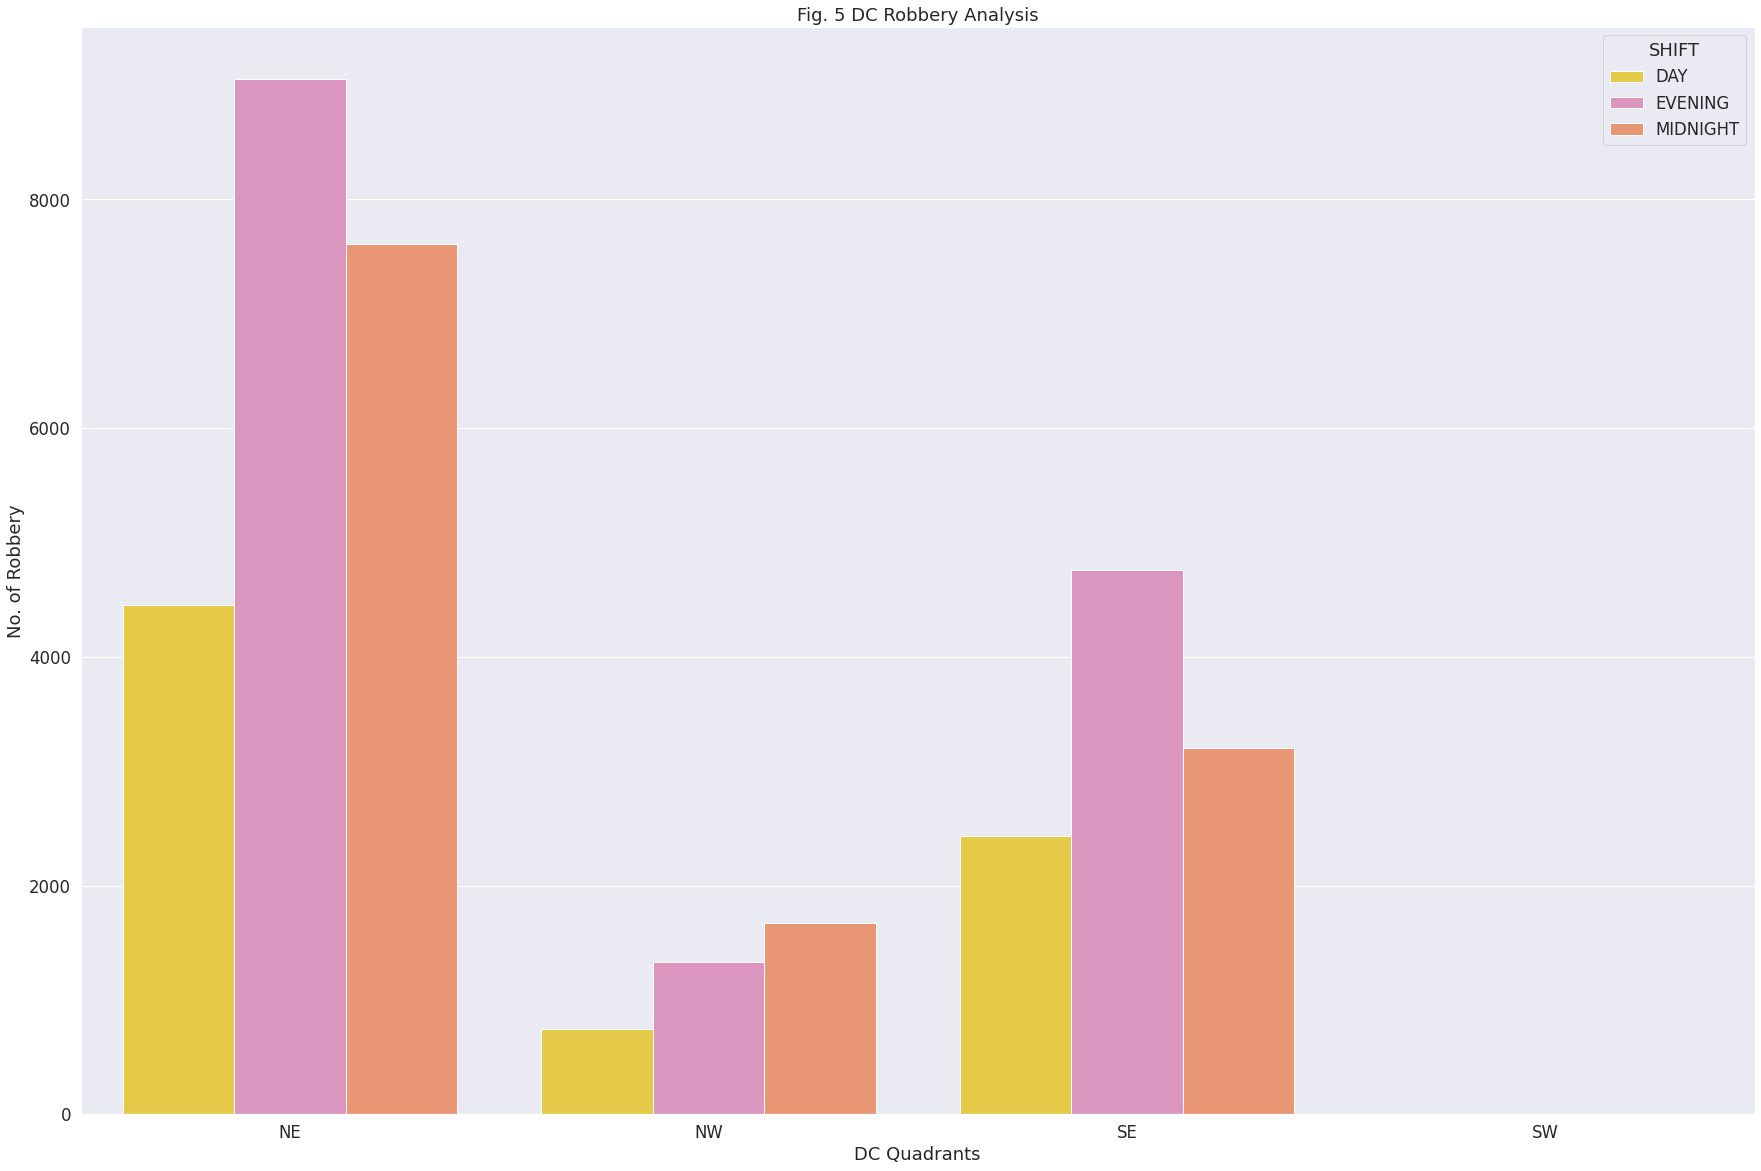

In [30]:
# third, we will plot a histogram to compare the number of robberies according to 'SHIFT' in each quadrant

fig, ax = plt.subplots(figsize = (30, 20))

df4_robberygroup = df4_robbery.groupby(['QUADRANT', 'SHIFT']).count().reset_index()
sns.barplot(x = 'QUADRANT', y = 'OFFENSE', hue = 'SHIFT', palette = 'Set2_r' ,data = df4_robberygroup)
ax.set(xlabel = 'DC Quadrants', ylabel = 'No. of Robbery', title = 'Fig. 5 DC Robbery Analysis')

In [31]:
# next, we want to merge both dc crime and property dataset
# this is so that we can plot the relationship between average PSF and robbery rate to prove our hypothesis
# to do so, we execute an outer merge of df4_robberygroup and df3_grouped on 'QUADRANT'

df5_merge = pd.merge(df4_robberygroup, df3_grouped, on = 'QUADRANT', how = 'outer')

df5_merge

,QUADRANT,SHIFT,OFFENSE,METHOD,DISTRICT,CLUSTER,PRECINCT,year,quad,crimetype,PRICE,LANDAREA,Avg_PSF
0,NE,DAY,4456,4456,4454,4398,4453,4456,4456,4456,6.061860e+09,27332774,221.779912
1,NE,EVENING,9054,9054,9048,8958,9050,9054,9054,9054,6.061860e+09,27332774,221.779912
2,NE,MIDNIGHT,7610,7610,7604,7524,7609,7610,7610,7610,6.061860e+09,27332774,221.779912
3,NW,DAY,745,745,745,744,745,745,745,745,3.159369e+10,63679581,496.135333
4,NW,EVENING,1330,1330,1330,1324,1330,1330,1330,1330,3.159369e+10,63679581,496.135333
5,NW,MIDNIGHT,1677,1677,1676,1675,1677,1677,1677,1677,3.159369e+10,63679581,496.135333
6,SE,DAY,2433,2433,2431,2373,2432,2433,2433,2433,3.948162e+09,18647192,211.729579
7,SE,EVENING,4757,4757,4757,4622,4757,4757,4757,4757,3.948162e+09,18647192,211.729579
8,SE,MIDNIGHT,3204,3204,3202,3128,3204,3204,3204,3204,3.948162e+09,18647192,211.729579
9,SW,MIDNIGHT,1,1,1,0,1,1,1,1,6.112335e+08,1486414,411.213492


<AxesSubplot:xlabel='OFFENSE', ylabel='Avg_PSF'>

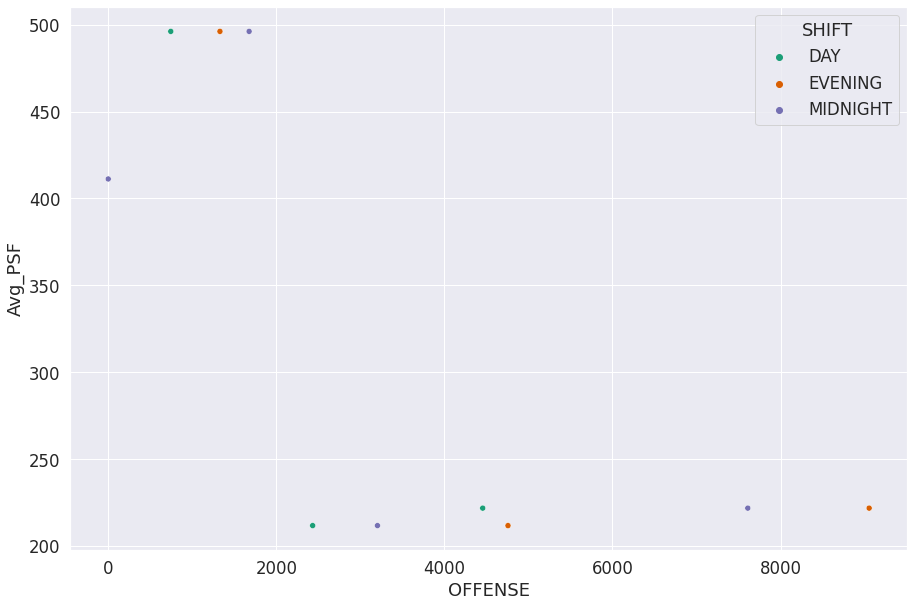

In [32]:
# we then establish the relationship between average PSF (i.e. affluence), number of robberies, and when it occurs

fig, ax = plt.subplots(figsize = (15, 10))

sns.scatterplot(x = 'OFFENSE', y = 'Avg_PSF', hue = 'SHIFT',
            palette = 'Dark2', data = df5_merge)

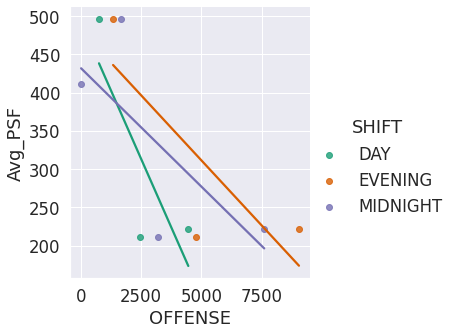

In [33]:
# we then establish the relationship between average PSF (i.e. affluence), number of robberies, and when it occurs
# fig, ax = plt.subplots(figsize = (30, 20))

sns.lmplot(x = 'OFFENSE', y = 'Avg_PSF', hue = 'SHIFT', palette = 'Dark2', 
           data = df5_merge, ci = None)

### <font color="blue"> Test Result for Hypothesis 3: 
    
### We hypothesised that there are more midnight robberies in the more affluent parts of DC. However, based on Fig. 6, the hypothesis is proven false. There seems to be lesser number of midnight and even evening robberies in the more affluent parts of DC. Instead, the less affluent parts see more robberies, mostly in the evenings.
    
### <font color="red"> Result: HYPOTHESIS DEBUNKED!
    
### We conclude that this could possibly be because there are also more security measures and police patrols in the more affluent parts of DC, hence, lesser opportunities for robberies to take place regardless of the time of day.